# Processamento de Imagens

# Aula 4 - Técnicas de Tranformação "ponto-a-ponto" - Point Processing

Nome Completo: João Pedro Silva Barbosa


Data: 04/03/2024

## **Parte 1. Importação de bibliotecas e manipulação das imagens**

In [ ]:
# Biblioteca OpenCV para manipulação de imagens
import cv2 as cv
from google.colab.patches import cv2_imshow # função imshow "adaptada" para poder funcionar no Colab
import numpy as np

# Pacote de funções para plot
import matplotlib.pylab as plt

# Pacote para importar as imagens
import imageio as io

url = "https://www.cruzeirodosul.edu.br/wp-content/uploads/2020/11/campus_guarulhos_nossasunidades2-b.jpg"
img = io.imread(url);

<ipython-input-2-609a69d9fced>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = io.imread(url);


Visualizando a imagem com a biblioteca *matplotlib*

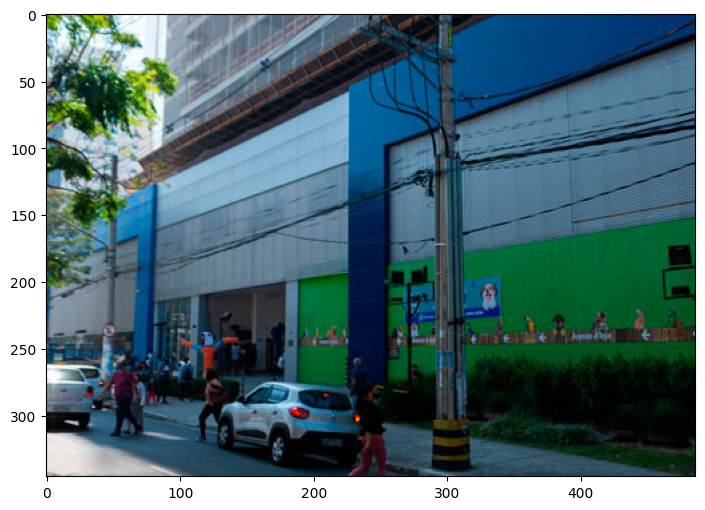

In [ ]:
plt.figure(figsize = (18,6))
plt.imshow(img);

Visualizando a imagem com a bibliote OpenCV

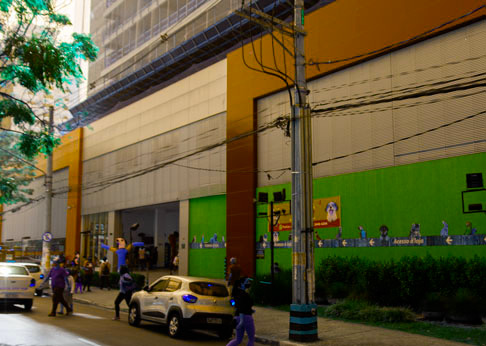

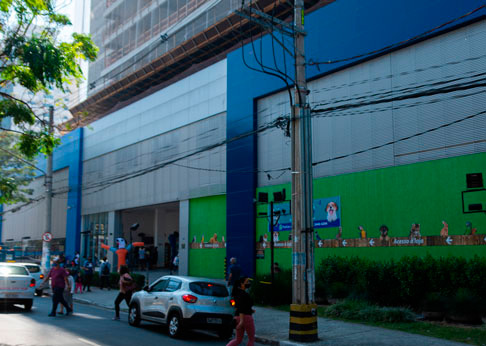

In [ ]:
cv2_imshow(img);

img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv2_imshow(img2);

Transformação da imagem para a escala de cinza

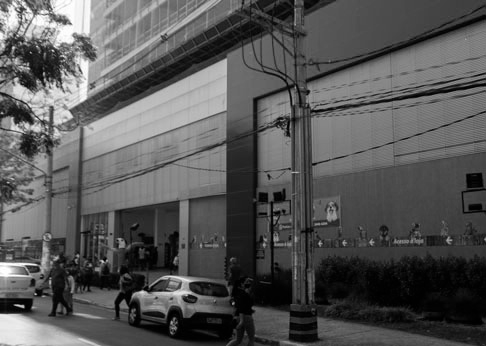

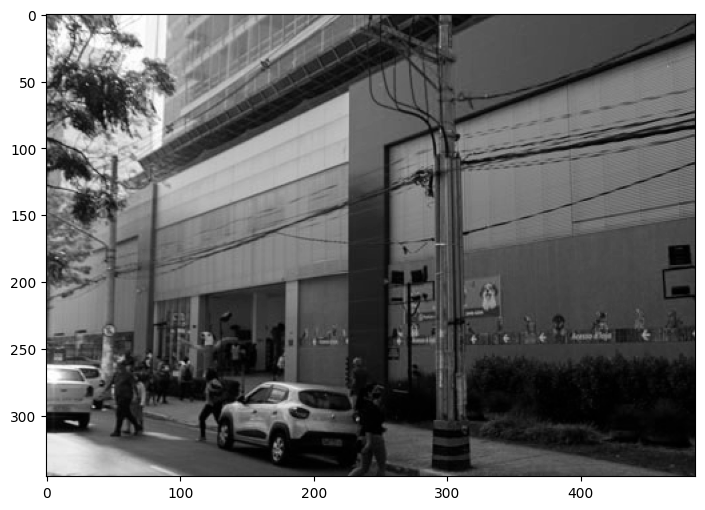

In [ ]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

plt.figure(figsize = (18,6))
plt.imshow(gray_img, cmap='gray', vmin=0, vmax=255);

## **Parte 2 - Inversão de Imagens**

<ipython-input-6-cfeadfa9fbb7>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = io.imread(url);


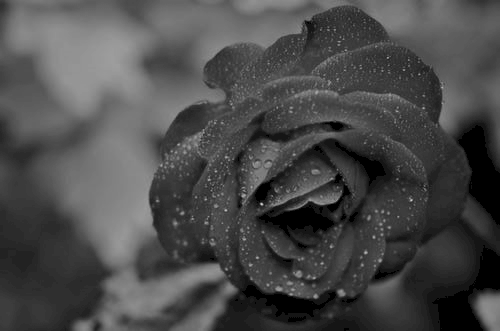

In [ ]:
url = "https://i.stack.imgur.com/TPVnd.png"
img = io.imread(url);
cv2_imshow(img)

Inversão bit a bit (bitwise)



```
# NOT 0111  (decimal 7)
    = 1000    (decimal 8)
```



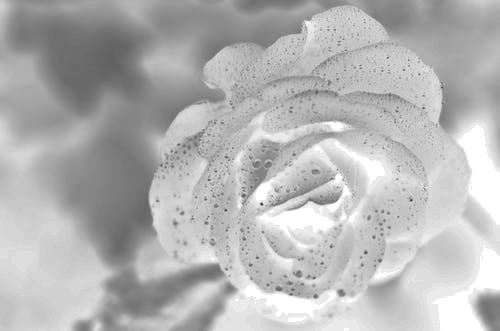

In [ ]:
inv_img = cv.bitwise_not(img)
cv2_imshow(inv_img)

Operação de inversão do valor de cinza:

$$ s = 1.0 - r$$

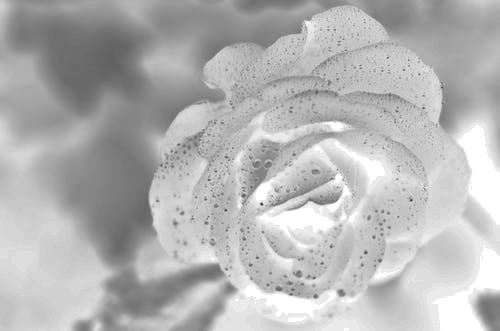

In [ ]:
inv_img2 = (255 - img)
cv2_imshow(inv_img2)

## **Parte 3 - Limiarização (Thresholding)**

Se o valor do pixel for maior que o limiar "k" a saída é 1.0 (ou 255), caso contrário a saída será 0.0 (ou 0).

<ipython-input-9-1863eaa80f0c>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = io.imread(url);


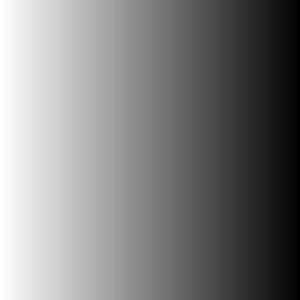

In [ ]:
url = "https://img.freepik.com/premium-vector/white-black-gradient-square-shape_118124-11165.jpg"
img = io.imread(url);
img = cv.resize(img, (300, 300), interpolation = cv.INTER_NEAREST)
cv2_imshow(img)

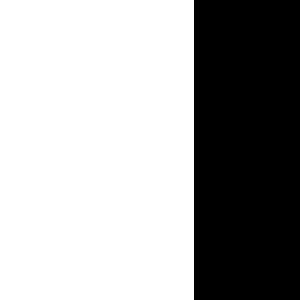

In [ ]:
k, thresh = cv.threshold(img,90,255,cv.THRESH_BINARY) # (imagem, limiar k, valor se verdadeiro, tipo de threshold)
cv2_imshow(thresh)

<font color='red'>**Exercício:**</font> Implemente sua própria função de limiarização e aplique 4 valores diferentes de threshold para a seguinte imagem:

<ipython-input-11-7d63bb463dae>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = io.imread(url);


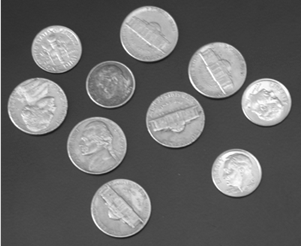

In [ ]:
url = "https://media.cheggcdn.com/media/df3/df3c284b-a776-404a-81e7-96f6487c383f/phpONQILA"
img = io.imread(url);
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# img = cv.resize(img, (450, 429), interpolation = cv.INTER_NEAREST)
cv2_imshow(img)

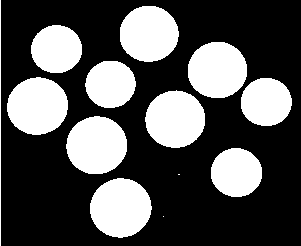

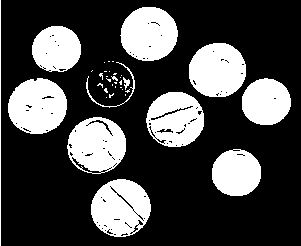

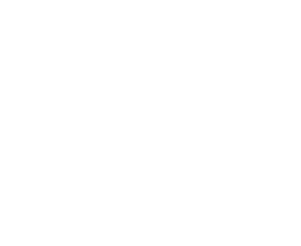

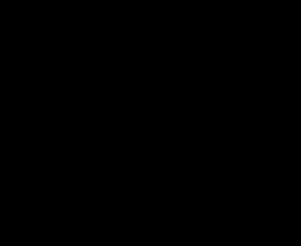

In [ ]:
### INSIRA AQUI O SEU CÓDIGO ###
def limiarizacao(limiar):
  novaImg = img.copy()
  for x in range(0, novaImg.shape[0]):
    for y in range(0, novaImg.shape[1]):
      if (novaImg[x, y] > limiar):
        novaImg[x, y] = 255
      else:
        novaImg[x, y] = 0
  cv2_imshow(novaImg)

limiarizacao(80)
limiarizacao(150)
limiarizacao(0)
limiarizacao(255)






## **Parte 4 - Transformação Logaritmica**

$$s = c * \log(1 + r)$$

<ipython-input-13-c3c09bf82a67>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = io.imread(url);


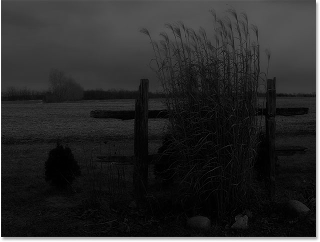

In [ ]:
url = "https://pe-images.s3.amazonaws.com/photo-editing/cc/tone-and-color/brightness-contrast/image-uselegacyoff-brightnessmin.jpg"
img = io.imread(url);
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.resize(img, (320, 242), interpolation = cv.INTER_CUBIC)
cv2_imshow(img)

<ipython-input-14-880c023f195c>:4: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(img + 1))
<ipython-input-14-880c023f195c>:7: RuntimeWarning: invalid value encountered in cast
  log_img = np.array(log_img, dtype = np.uint8)


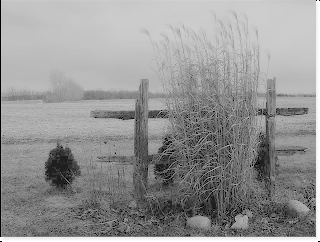

In [ ]:
c = 255 / np.log(1 + np.max(img))

# Aplicação da transformação log
log_img = c * (np.log(img + 1))

# Especificar tipo "uint8" pois os resultados de da função log sairam em float
log_img = np.array(log_img, dtype = np.uint8)

cv2_imshow(log_img)

Variação da "curva"

m = valor máximo do pixel (255 para 8bits)
b = "modificador"

$c = \frac{m}{\ln(1+mb)}$

$ s = c*log(br + 1)$

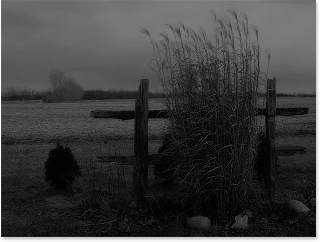

In [ ]:
m = 255
b = 0.01
c = m / np.log(1 + (b*np.max(img)))

# Aplicação da transformação log
log_img = c * (np.log((b*img) + 1))

# Especificar tipo "uint8" pois os resultados de da função log sairam em float
log_img = np.array(log_img, dtype = np.uint8)

cv2_imshow(log_img)

## **Parte 5. Aplicação da lei de potência**

In [ ]:
url = "sample_image.png"
img = io.imread(url);
cv2_imshow(img);

<ipython-input-16-79c5b2502cfb>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = io.imread(url);


FileNotFoundError: No such file: '/content/sample_image.png'

In [ ]:
max = 255;
gama = 6.5;
c = max/(max**gama);
img_power = c*img**gama;

cv2_imshow(img_power);

<font color='red'>**Exercício:**</font> Com base no exemplo do gráfico abaixo mostre as diferentes curvas de lei de potência para os seguinte valores de gama:


*   Gama = 0.6;
*   Gama = 0.4;
*   Gama = 1;
*   Gama = 1.5;
*   Gama = 2.5;

Mostre todas as curvas num mesmo gráfico e reponda:

1.   O que acontecerá na imagem de saída quando o valor de gama é igual a 1?
2.   O que acontecerá na imagem de saída quando o valor de gama é está entre 0 e 1?
3. O que acontecerá na imagem de saída quando o valor de gama é maior que 1?

In [ ]:
max = 1;
r = np.arange(0,max,0.01);
gama = 1;
c = max/(max**gama);
s = c*r**gama;

plt.figure(figsize = (6,6))
plt.plot(r,s);
plt.grid(True)
plt.xlabel("Valor de entrada (r)");
plt.ylabel("Valor de saída (s)");
plt.legend(['gama = 1'])

In [ ]:
max = 1;
r = np.arange(0,max,0.01);
gama = 1;
c = max/(max**gama);
s = c*r**gama;

plt.figure(figsize = (6,6))
plt.plot(r,s);
plt.grid(True)
plt.xlabel("Valor de entrada (r)");
plt.ylabel("Valor de saída (s)");

max = 1;
r = np.arange(0,max,0.01);
gama = 0.6;
c = max/(max**gama);
s = c*r**gama;
plt.plot(r,s)

max = 1;
r = np.arange(0,max,0.01);
gama = 0.4;
c = max/(max**gama);
s = c*r**gama;
plt.plot(r,s)

max = 1;
r = np.arange(0,max,0.01);
gama = 1.5;
c = max/(max**gama);
s = c*r**gama;
plt.plot(r,s)

max = 1;
r = np.arange(0,max,0.01);
gama = 2.5;
c = max/(max**gama);
s = c*r**gama;
plt.plot(r,s)
plt.legend(['gama = 1', 'gama = 0.6', 'gama = 0.4', 'gama = 1.5', 'gama = 2.5'])

1.   O que acontecerá na imagem de saída quando o valor de gama é igual a 1?
2.   O que acontecerá na imagem de saída quando o valor de gama é está entre 0 e 1?
3. O que acontecerá na imagem de saída quando o valor de gama é maior que 1?

1. Resposta: O valor de saída dos pixels é exatamente igual o valor de entrada
2. Resposta: O valor de saída dos pixels será maior do que o valor de entrada, quando eles forem maiores que 0 e menores que 1. Ou seja a imagem mudará para tons mais claros de cinza.
3. Resposta: O valor de saída dos pixels será menor do que o valor de entrada, quando eles forem maiores que 0 e menores que 1. Ou seja, a imagem mudará para tons mais escuros de cinza.